In [4]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import random
import pandas as pd
import time

import matplotlib as mpl
import matplotlib.pyplot as plt

plt.rc('text',usetex=True)
plt.rcParams['font.family']='sans-serif'
plt.rcParams['font.sans-serif']=['Verdana']
plt.rcParams.update({'font.size': 15})
def adjust_spines(ax, spines):
    for loc, spine in ax.spines.items():
        if loc in spines:
            spine.set_position(('outward', 5))
        else:
            spine.set_color('none')
    if 'left' in spines:
        ax.yaxis.set_ticks_position('left')
    else:
        ax.yaxis.set_ticks([])
    if 'bottom' in spines:
        ax.xaxis.set_ticks_position('bottom')
    else:
            ax.xaxis.set_ticks([])
mpl.rcParams['figure.facecolor'] = 'white'
mpl.rcParams['figure.dpi'] = 150
dpiFig = 300.

In [5]:
base_dir = '/glade/work/kjmayer/research/catalyst/TransferLearning/runmean_analysis/artificial_bias/perfectmodel_TLtest/E3SM_analysis/'

In [6]:
# data for panel (a)
ddir = base_dir+'test/confvsacc/'
EXP_NAME = 'exp2'
EXP_NAME2 = 'exp2_retrain' 

finame = 'confvsacc_ann1_60Eshift_'+EXP_NAME+'.npy'
ann1_acc = np.load(ddir+finame)
ann1_acc[ann1_acc==0] = np.nan

finame = 'confvsacc_ann1_noshift_'+EXP_NAME+'.npy'
ann1_acc_noshift = np.load(ddir+finame)
ann1_acc_noshift[ann1_acc_noshift==0] = np.nan

finame = 'confvsacc_ann2_60Eshift_'+EXP_NAME2+'.8_ann1-'+EXP_NAME+'.npy'
ann2_acc = np.load(ddir+finame)
ann2_acc[ann2_acc==0] = np.nan

# --- ANN1
ann1_acc_avg = np.nanmedian(ann1_acc,axis=0)
ann1_acc_min = np.nanmin(ann1_acc,axis=0)
ann1_acc_max = np.nanmax(ann1_acc,axis=0)

ann1_acc_noshift_avg = np.nanmedian(ann1_acc_noshift,axis=0)
ann1_acc_noshift_min = np.nanmin(ann1_acc_noshift,axis=0)
ann1_acc_noshift_max = np.nanmax(ann1_acc_noshift,axis=0)

# --- ANN2
ann2_acc_avg = np.nanmedian(ann2_acc,axis=0)
ann2_acc_min = np.nanmin(ann2_acc,axis=0)
ann2_acc_max = np.nanmax(ann2_acc,axis=0)

### PLOT

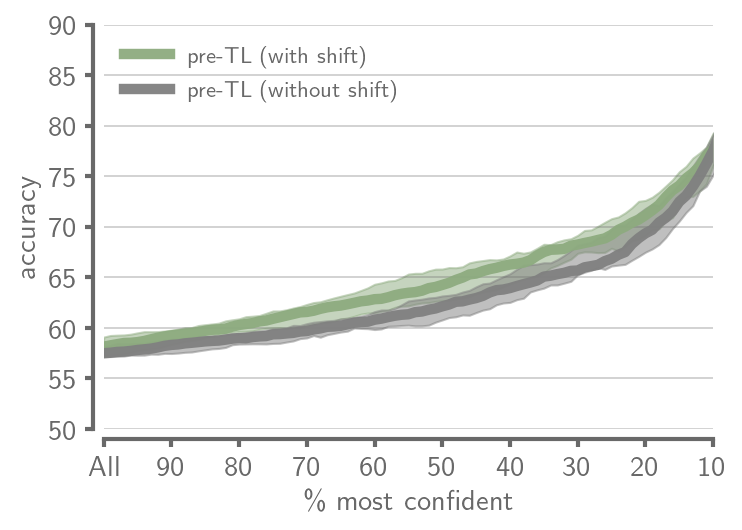

In [11]:
# -- PLOT
cesmcolor = 'k'
allobscolor = 'darkslateblue'
preTLcolor = (141/255,171/255,127/255,1.)
postTLcolor = 'cadetblue'
diffcolor = 'grey'
FS = 14

fig = plt.figure(figsize=(5,3.5))
ax = fig.subplot_mosaic('''
                        A
                        ''')
plt.tight_layout(w_pad=1,h_pad=3.5)

for loc in ['A']:
    adjust_spines(ax[loc], ['left', 'bottom'])
    ax[loc].spines['top'].set_color('none')
    ax[loc].spines['right'].set_color('none')
    ax[loc].spines['left'].set_color('dimgrey')
    ax[loc].spines['bottom'].set_color('dimgrey')
    ax[loc].spines['left'].set_linewidth(2)
    ax[loc].spines['bottom'].set_linewidth(2)
    ax[loc].tick_params('both',length=4,width=2,which='major',color='dimgrey')
    ax[loc].yaxis.grid(zorder=1,color='dimgrey',alpha=0.35)

    if loc == 'A':
        ax[loc].set_ylim(50,90)
        ax[loc].set_xlim(0,90)
        ax[loc].set_ylabel('accuracy',fontsize=FS,color='dimgrey')
        ax[loc].set_yticks(np.arange(50,95,5),labels=np.arange(50,95,5),fontsize=FS,color='dimgrey')
        ax[loc].set_xticks(np.arange(0,100,10),['All',90,80,70,60,50,40,30,20,10],fontsize=FS,color='dimgrey')
        ax[loc].set_xlabel('\% most confident',fontsize=FS,color='dimgrey')


# -----------------------------------
# ----- panel (a) -----
# -----------------------------------
ax['A'].fill_between(np.arange(0,100,1),ann1_acc_min,ann1_acc_max,color=preTLcolor, alpha=0.5)
ax['A'].fill_between(np.arange(0,100,1),ann1_acc_noshift_min,ann1_acc_noshift_max,color='grey', alpha=0.5)
# ax['A'].fill_between(np.arange(0,100,1),ann2_acc_min,ann2_acc_max,color=postTLcolor, alpha=0.5)

ax['A'].plot(ann1_acc_avg, '-', color=preTLcolor, alpha=0.95,linewidth=5,label='pre-TL (with shift)')
ax['A'].plot(ann1_acc_noshift_avg, '-', color='grey', alpha=0.95,linewidth=5,label='pre-TL (without shift)')
# ax['A'].plot(ann2_acc_avg, '-', color=postTLcolor, alpha=0.95,linewidth=5,label='post-TL (without shift)')

ax['A'].legend(frameon=False, fontsize=FS-3, labelcolor='dimgrey', loc='upper left',ncol=1)

# plt.show()
plt.savefig('plots/FigureA2.png', dpi=300, transparent = True, bbox_inches = 'tight')